## Face Mask Detection with Deeplearning CNN Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


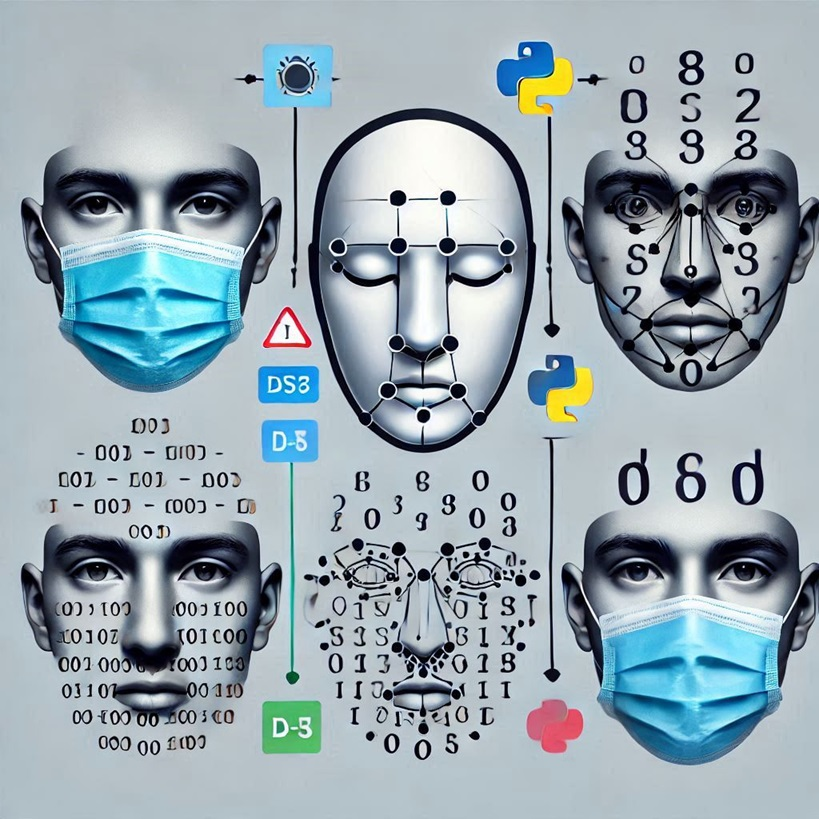

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Face Mask detection with CNN/Facemask detection.jpeg', width=300)

In [3]:
!pip install kaggle

**Connect to Kaggle Dataset**

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:08<00:00, 19.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


**Import the Dataset**

In [5]:
# API to fetch the dataset from Kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:06<00:00, 28.0MB/s]
100% 163M/163M [00:07<00:00, 24.4MB/s]


**Extract the dataset files**

In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  drive  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

**`Data with Mask`**

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

type(with_mask_files)

['with_mask_2745.jpg', 'with_mask_1886.jpg', 'with_mask_53.jpg', 'with_mask_1743.jpg', 'with_mask_1554.jpg']
['with_mask_1541.jpg', 'with_mask_1342.jpg', 'with_mask_1936.jpg', 'with_mask_3324.jpg', 'with_mask_2439.jpg']


list

**`Data without Mask`**

In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3524.jpg', 'without_mask_2833.jpg', 'without_mask_2363.jpg', 'without_mask_2427.jpg', 'without_mask_730.jpg']
['without_mask_2566.jpg', 'without_mask_3473.jpg', 'without_mask_481.jpg', 'without_mask_45.jpg', 'without_mask_433.jpg']


**`Count of images with Mask and Without Mask`**

In [19]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


### **`Creating Labels for the two class of Images`**

---



**`with mask  -->  1`**

**`without mask  -->  0`**







In [20]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [21]:

print(f"With Mask labels" ,with_mask_labels[0:10])

print(f"Without Mask Labels", without_mask_labels[0:10])

With Mask labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without Mask Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **`Check the count of the Labels`**

In [22]:
print("Count of Labels with Mask :", len(with_mask_labels))
print("Count of Labels without Mask: ", len(without_mask_labels))

Count of Labels with Mask : 3725
Count of Labels without Mask:  3828


### **`Combine Labels`**

In [23]:
labels = with_mask_labels + without_mask_labels

print(len(labels),"\n")

print("Labels with Mask", labels[0:5],"\n")

print("Labels without Mask", labels[-5:])

7553 

Labels with Mask [1, 1, 1, 1, 1] 

Labels without Mask [0, 0, 0, 0, 0]


### **`Display the Images`**

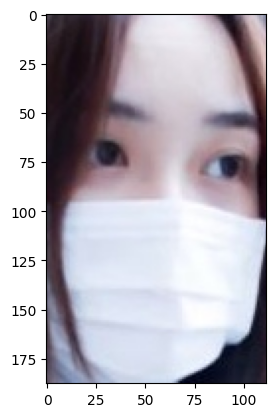

In [24]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_12.jpg')
imgplot = plt.imshow(img)
plt.show()

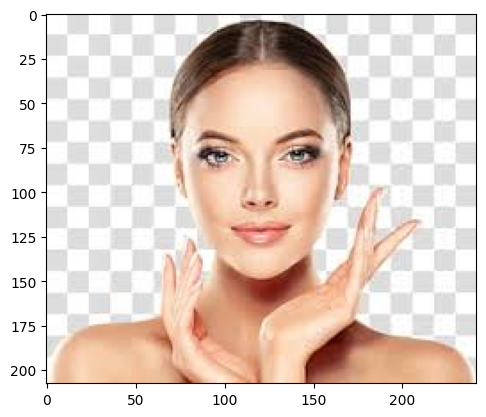

In [25]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2921.jpg')
imgplot = plt.imshow(img)
plt.show()

### **`Image Pre-Processing`**

**`1. Resize the Images`**

**`2. Convert the images to numpy arrays`**








In [26]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [27]:
type(data)

list

In [28]:
len(data)

7553

array([[[163, 171, 174],
        [162, 171, 174],
        [157, 164, 167],
        ...,
        [ 16,   7,   5],
        [ 19,   9,   9],
        [ 21,  11,  10]],

       [[150, 157, 160],
        [138, 145, 148],
        [115, 121, 124],
        ...,
        [ 13,  10,   7],
        [ 12,   9,   6],
        [  7,   4,   1]],

       [[ 77,  82,  85],
        [ 69,  74,  77],
        [ 51,  56,  59],
        ...,
        [  5,   9,   4],
        [  6,  10,   4],
        [  3,   7,   2]],

       ...,

       [[237, 203, 211],
        [235, 198, 203],
        [226, 177, 180],
        ...,
        [ 36,  31,  37],
        [ 41,  36,  42],
        [ 37,  32,  40]],

       [[208, 186, 195],
        [224, 199, 206],
        [229, 192, 195],
        ...,
        [ 35,  32,  36],
        [ 41,  39,  42],
        [ 37,  35,  40]],

       [[197, 184, 193],
        [202, 183, 190],
        [209, 178, 182],
        ...,
        [ 31,  29,  32],
        [ 34,  32,  35],
        [ 29,  27,  30]]], dtype=uint8)
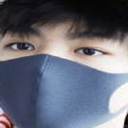

In [29]:
data[6]

In [30]:
type(data[6])

numpy.ndarray

In [31]:
data[6].shape

(128, 128, 3)

### **`Converting image list and label list to numpy arrays`**

In [32]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [33]:
type(X)

numpy.ndarray

In [34]:
type(Y)

numpy.ndarray

In [35]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [36]:
print(Y)

[1 1 1 ... 0 0 0]


## **`Train Test Split`**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


### **`Scaling the Data`**

In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[184, 183, 181],
        [177, 176, 174],
        [164, 163, 161],
        ...,
        [121, 105, 106],
        [124, 108, 109],
        [125, 109, 110]],

       [[202, 201, 199],
        [172, 171, 169],
        [133, 131, 129],
        ...,
        [121, 105, 106],
        [123, 107, 108],
        [124, 108, 109]],

       [[193, 189, 188],
        [159, 155, 154],
        [116, 112, 111],
        ...,
        [119, 103, 104],
        [120, 104, 105],
        [119, 103, 104]],

       ...,

       [[109, 153, 124],
        [108, 153, 125],
        [109, 152, 124],
        ...,
        [162, 125, 116],
        [164, 127, 118],
        [165, 128, 119]],

       [[ 85, 132, 100],
        [ 85, 132, 101],
        [ 86, 133, 101],
        ...,
        [167, 130, 121],
        [164, 126, 118],
        [161, 124, 115]],

       [[ 74, 124,  89],
        [ 75, 125,  90],
        [ 76, 126,  91],
        ...,
        [165, 128, 119],
        [162, 124, 116],
        [159, 122, 113]]], dtype=uint8)
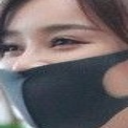

In [42]:
X_train[0]

In [43]:
X_train_scaled[0]

array([[[0.72156863, 0.71764706, 0.70980392],
        [0.69411765, 0.69019608, 0.68235294],
        [0.64313725, 0.63921569, 0.63137255],
        ...,
        [0.4745098 , 0.41176471, 0.41568627],
        [0.48627451, 0.42352941, 0.42745098],
        [0.49019608, 0.42745098, 0.43137255]],

       [[0.79215686, 0.78823529, 0.78039216],
        [0.6745098 , 0.67058824, 0.6627451 ],
        [0.52156863, 0.51372549, 0.50588235],
        ...,
        [0.4745098 , 0.41176471, 0.41568627],
        [0.48235294, 0.41960784, 0.42352941],
        [0.48627451, 0.42352941, 0.42745098]],

       [[0.75686275, 0.74117647, 0.7372549 ],
        [0.62352941, 0.60784314, 0.60392157],
        [0.45490196, 0.43921569, 0.43529412],
        ...,
        [0.46666667, 0.40392157, 0.40784314],
        [0.47058824, 0.40784314, 0.41176471],
        [0.46666667, 0.40392157, 0.40784314]],

       ...,

       [[0.42745098, 0.6       , 0.48627451],
        [0.42352941, 0.6       , 0.49019608],
        [0.42745098, 0

### **`Building a Self -configured Convolutional Neural Networks (CNN)`**

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
#model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.6632 - loss: 0.6965 - val_acc: 0.8876 - val_loss: 0.2697
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8776 - loss: 0.3075 - val_acc: 0.9041 - val_loss: 0.2181
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9108 - loss: 0.2389 - val_acc: 0.9140 - val_loss: 0.1958
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9222 - loss: 0.1938 - val_acc: 0.9223 - val_loss: 0.2081
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9411 - loss: 0.1694 - val_acc: 0.8860 - val_loss: 0.2445
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9544 - loss: 0.1262 - val_acc: 0.9355 - val_loss: 0.1926
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9653 - loss: 0.1005 - val_acc: 0.9091 - val_loss: 0.2695
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9583 - loss: 0.1182 - val_acc: 0.9372 - val_loss: 0.2575
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms

**Model Evaluation**

In [51]:
loss, accuracy1 = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9248 - loss: 0.3443
Test Accuracy = 0.9278623461723328


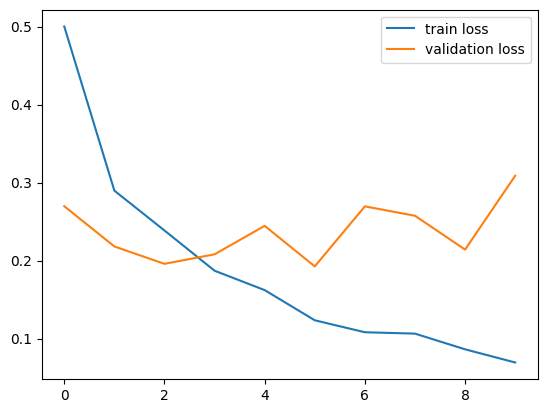

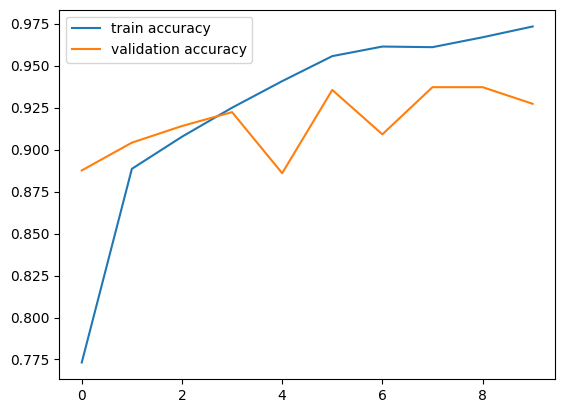

In [52]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



### **`Classification Report`**




In [79]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       768
           1       0.92      0.93      0.92       743

    accuracy                           0.93      1511
   macro avg       0.93      0.93      0.93      1511
weighted avg       0.93      0.93      0.93      1511



## **`Confusion Matrix`**

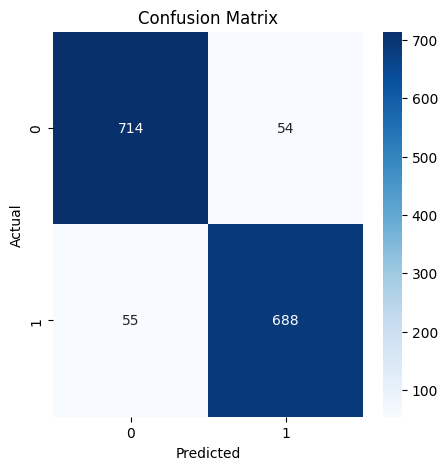

In [78]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **`Model Prediction`**

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


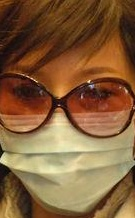

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.00107501 0.97846806]]
1
The person in the image is wearing a mask


In [58]:
input_image_path = input('Path of the image to be predicted: ')

## Input image for testing without mask image --> /content/data/without_mask/without_mask_10.jpg

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


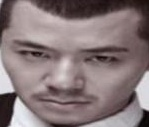

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.6606765  0.34184015]]
0
The person in the image is not wearing a mask


In [60]:
input_image_path = input('Path of the image to be predicted: ')

##input image path --> /content/data/with_mask/with_mask_10.jpg

input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
  print(f"Error: Could not load image from path: {input_image_path}")
  print("Please check if the path is correct and the image file exists.")
  # You can exit the script or handle the error as needed
  # For example, you can use 'exit()' to stop the script
  exit()

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

## RESNET 50

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
     input_shape=image_shape)

model1 = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),

    Dense(2, activation ='sigmoid')

])

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [62]:
# model summary

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)             │ (None, 4, 4, 2048)          │      58,331,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32768)               │         131,072 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,852,098 (255.02 MB)

 Trainable params: 66,642,818 (254.22 MB)

 Non-trainable params: 209,280 (817.50 KB)

In [63]:
model1.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# training the neural network
history1 = model1.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 233s 610ms/step - accuracy: 0.8779 - loss: 0.5214 - val_accuracy: 0.9521 - val_loss: 1.1558
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 50s 294ms/step - accuracy: 0.9861 - loss: 0.0532 - val_accuracy: 0.9868 - val_loss: 0.0471
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 288ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9901 - val_loss: 0.0294
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 290ms/step - accuracy: 0.9960 - loss: 0.0178 - val_accuracy: 0.9868 - val_loss: 0.0364
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 288ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9917 - val_loss: 0.0339
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 290ms/step - accuracy: 0.9918 - loss: 0.0284 - val_accuracy: 0.9901 - val_loss: 0.0405
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 289ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9917 - val_loss: 0.0301
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 289ms/step - accuracy: 0.9979 - loss: 

### **`Model Evaluation`**

In [70]:
loss, accuracy2 = model1.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy2)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9842 - loss: 0.0574
Test Accuracy = 0.9861019253730774


### **`Plotting Loss and Accuracy`**

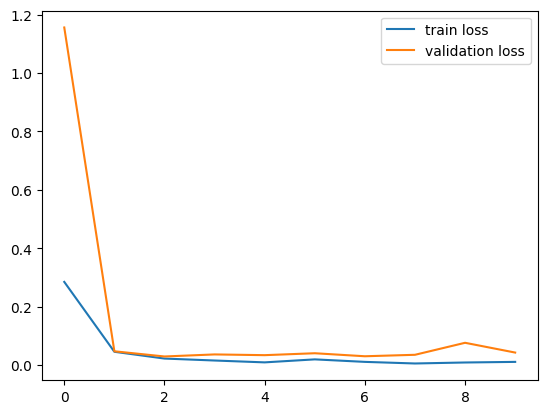

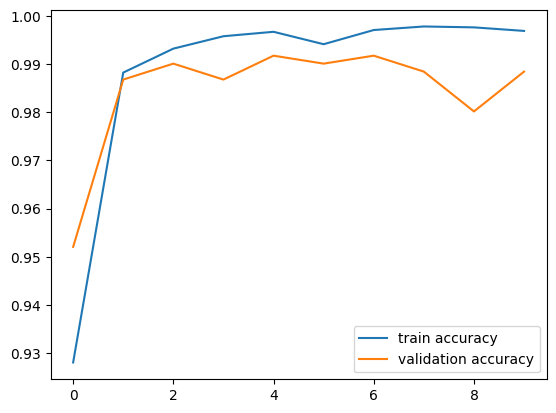

In [71]:
h = history1

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')  # Changed 'acc' to 'accuracy'
plt.plot(h.history['val_accuracy'], label='validation accuracy')  # Changed 'val_acc' to 'val_accuracy'
plt.legend()
plt.show()

### **`Classification Report`**

In [73]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model1.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       768
           1       0.98      0.99      0.99       743

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



### **`Confusion Matrix`**

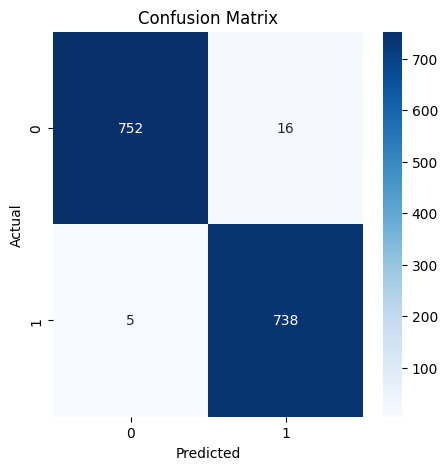

In [74]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **`Model Prediction`**

Path of the image to be predicted: /content/data/with_mask/with_mask_1003.jpg


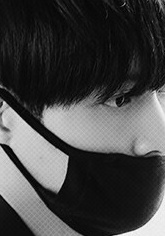

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[1.6498805e-05 1.0000000e+00]]
1
The person in the image is wearing a mask


In [75]:


input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model1.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1003.jpg


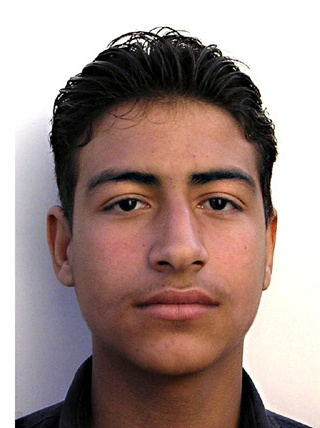

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[9.979984e-01 4.238314e-04]]
0
The person in the image is not wearing a mask


In [76]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model1.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

## Inception V3


In [80]:
# Fit a Inception V3 model to this data

image_size = (128, 128)
channels = 3
image_shape = (image_size[0], image_size[1], channels)

base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=image_shape
)

model2 = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(rate=0.2),
    Dense(2, activation='sigmoid')
])

# model summary
model2.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 8192)                │          32,768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,933,474 (91.30 MB)

 Trainable params: 23,882,658 (91.11 MB)

 Non-trainable params: 50,816 (198.50 KB)

In [81]:
model2.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
# training the neural network
history2 = model2.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 344ms/step - accuracy: 0.8778 - loss: 0.5489 - val_accuracy: 0.9785 - val_loss: 0.0972
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9901 - val_loss: 0.0380
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.9942 - loss: 0.0166 - val_accuracy: 0.9851 - val_loss: 0.0490
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9952 - loss: 0.0102 - val_accuracy: 0.9901 - val_loss: 0.0417
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 0.9917 - val_loss: 0.0422
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9985 - loss: 0.0038 - val_accuracy: 0.9917 - val_loss: 0.0404
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9851 - val_loss: 0.0720
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9962 - loss: 0.0097 

In [83]:
loss, accuracy3 = model2.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy3)

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9939 - loss: 0.0137
Test Accuracy = 0.9933818578720093


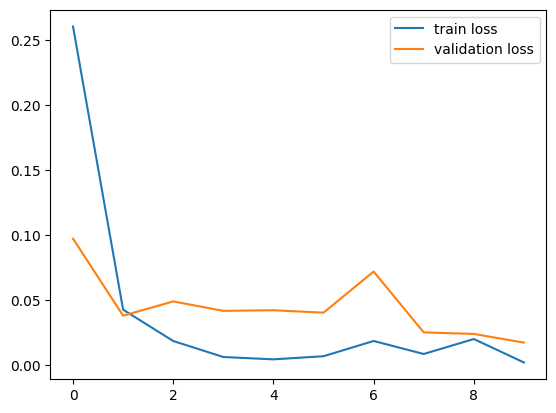

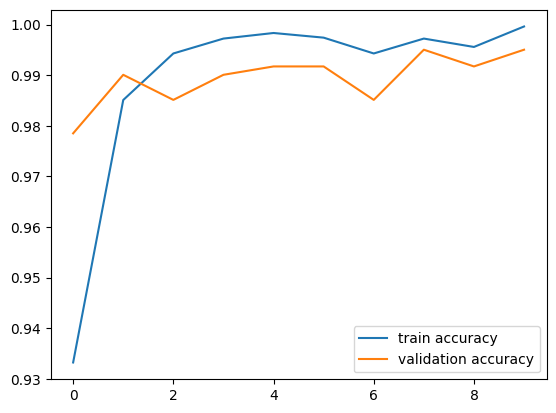

In [84]:
h = history2

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')  # Changed 'acc' to 'accuracy'
plt.plot(h.history['val_accuracy'], label='validation accuracy')  # Changed 'val_acc' to 'val_accuracy'
plt.legend()
plt.show()

In [85]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model2.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       768
           1       0.99      1.00      0.99       743

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



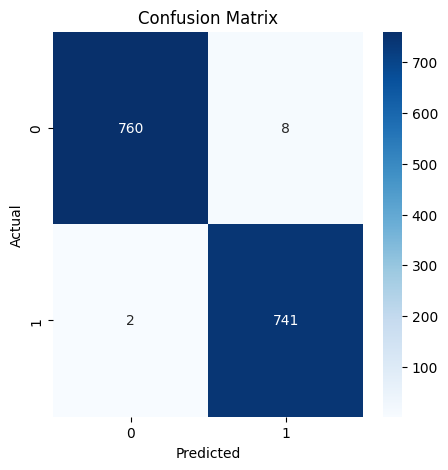

In [86]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Path of the image to be predicted: /content/data/without_mask/without_mask_1007.jpg


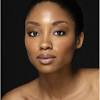

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[9.9893564e-01 9.8108861e-04]]
0
The person in the image is not wearing a mask


In [91]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
  print(f"Error: Could not load image from path: {input_image_path}")
  print("Please check if the path is correct and the image file exists.")
  exit()

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model2.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')



Path of the image to be predicted: /content/data/with_mask/with_mask_1005.jpg


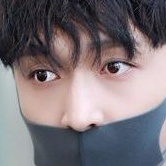

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.04709303 0.9916222 ]]
1
The person in the image is wearing a mask


In [92]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
  print(f"Error: Could not load image from path: {input_image_path}")
  print("Please check if the path is correct and the image file exists.")
  exit()

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model2.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


## Model Comparison

In [93]:
# Compare the accuracies of all the three models and create a dataframe and plot the graph

import pandas as pd
import matplotlib.pyplot as plt

# Assuming accuracy1, accuracy2, and accuracy3 are defined from previous code blocks
# Replace these with your actual accuracy values if they are different.

accuracy_data = {'Model': ['CNN', 'ResNet50', 'InceptionV3'],
                 'Accuracy': [accuracy1, accuracy2, accuracy3]}

df = pd.DataFrame(accuracy_data)

# Display the dataframe
print(df)

         Model  Accuracy
0          CNN  0.927862
1     ResNet50  0.986102
2  InceptionV3  0.993382


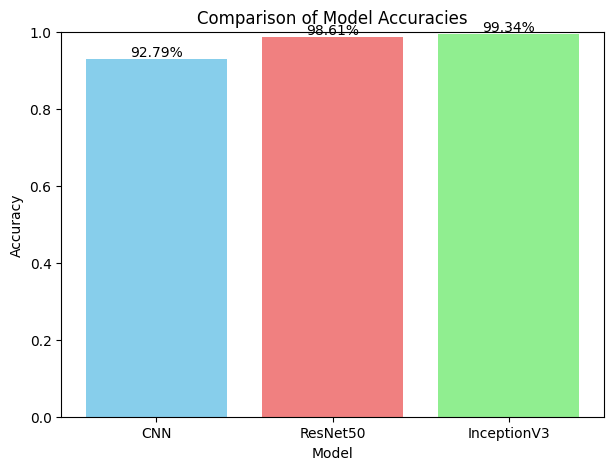

In [94]:

# Plot the accuracies
plt.figure(figsize=(7, 5))
bars = plt.bar(df['Model'], df['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for accuracy

# Add accuracy percentage labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.show()


### **`Best Model: Inception V3`**
### **`Accuracy: 99.34 %`**



